In [ ]:
# === Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Load the dataset
df = pd.read_csv("advanced_smartcart_dataset.csv")

# Display basic info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (1000, 16)


,Customer_ID,Customer_Name,Gender,Age,City,Segment,Store_Location,Product_ID,Product_Name,Category,Price,Quantity,Total,Payment_Method,Day,Date
0,C177,Neha,Male,34,Aurangabad,Premium,Store_C,P635,Beverages_Item_13,Beverages,182,4,728,Card,Monday,2025-09-29
1,C148,Isha,Female,30,Nashik,Regular,Store_A,P464,Beverages_Item_16,Beverages,92,4,368,Wallet,Monday,2025-09-15
2,C179,Isha,Female,30,Nashik,Budget,Store_D,P979,Electronics_Item_3,Electronics,325,4,1300,Wallet,Saturday,2025-09-27
3,C100,Neha,Male,36,Nashik,Premium,Store_B,P391,Beverages_Item_9,Beverages,588,2,1176,Card,Friday,2025-11-07
4,C167,Riya,Female,54,Pune,Premium,Store_A,P397,Grocery_Item_4,Grocery,670,5,3350,Wallet,Thursday,2025-10-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     1000 non-null   object
 1   Customer_Name   1000 non-null   object
 2   Gender          1000 non-null   object
 3   Age             1000 non-null   int64 
 4   City            1000 non-null   object
 5   Segment         1000 non-null   object
 6   Store_Location  1000 non-null   object
 7   Product_ID      1000 non-null   object
 8   Product_Name    1000 non-null   object
 9   Category        1000 non-null   object
 10  Price           1000 non-null   int64 
 11  Quantity        1000 non-null   int64 
 12  Total           1000 non-null   int64 
 13  Payment_Method  1000 non-null   object
 14  Day             1000 non-null   object
 15  Date            1000 non-null   object
dtypes: int64(4), object(12)
memory usage: 125.1+ KB


,Age,Price,Quantity,Total
count,1000.000000,1000.000000,1000.000000,1000.0000
mean,39.566000,521.691000,3.025000,1584.5810
std,12.308336,284.712375,1.411512,1218.6566
min,18.000000,21.000000,1.000000,29.0000
25%,29.000000,271.750000,2.000000,593.0000
50%,39.000000,529.000000,3.000000,1231.0000
75%,50.000000,759.000000,4.000000,2373.5000
max,60.000000,1000.000000,5.000000,4990.0000



Missing Values in Dataset:
Customer_ID       0
Customer_Name     0
Gender            0
Age               0
City              0
Segment           0
Store_Location    0
Product_ID        0
Product_Name      0
Category          0
Price             0
Quantity          0
Total             0
Payment_Method    0
Day               0
Date              0
dtype: int64


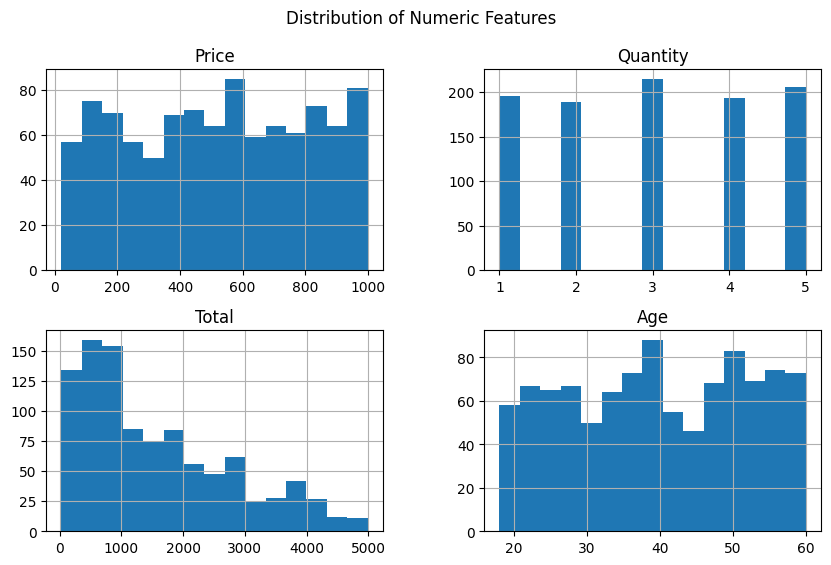

In [ ]:
# Checking data information
df.info()

# Summary statistics
display(df.describe())

# Checking for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Visualize distribution of key numeric columns
df[['Price', 'Quantity', 'Total', 'Age']].hist(figsize=(10,6), bins=15)
plt.suptitle("Distribution of Numeric Features")
plt.show()


In [ ]:
# Label Encoding for categorical variables
categorical_cols = ['Gender', 'City', 'Segment', 'Store_Location',
                    'Category', 'Payment_Method', 'Day']
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature Scaling for numerical columns
scaler = StandardScaler()
df[['Price', 'Quantity', 'Total', 'Age']] = scaler.fit_transform(df[['Price', 'Quantity', 'Total', 'Age']])

# Display first few rows
df.head()


,Customer_ID,Customer_Name,Gender,Age,City,Segment,Store_Location,Product_ID,Product_Name,Category,Price,Quantity,Total,Payment_Method,Day,Date
0,C177,Neha,1,-0.452440,0,1,2,P635,Beverages_Item_13,0,-1.193699,0.691094,-0.703241,0,1,2025-09-29
1,C148,Isha,0,-0.777586,4,2,0,P464,Beverages_Item_16,0,-1.509966,0.691094,-0.998796,3,1,2025-09-15
2,C179,Isha,0,-0.777586,4,0,3,P979,Electronics_Item_3,1,-0.691187,0.691094,-0.233637,3,2,2025-09-27
3,C100,Neha,1,-0.289867,4,1,1,P391,Beverages_Item_9,0,0.233015,-0.726535,-0.335439,0,0,2025-11-07
4,C167,Riya,0,1.173288,5,1,0,P397,Grocery_Item_4,2,0.521169,1.399908,1.449385,3,4,2025-10-02


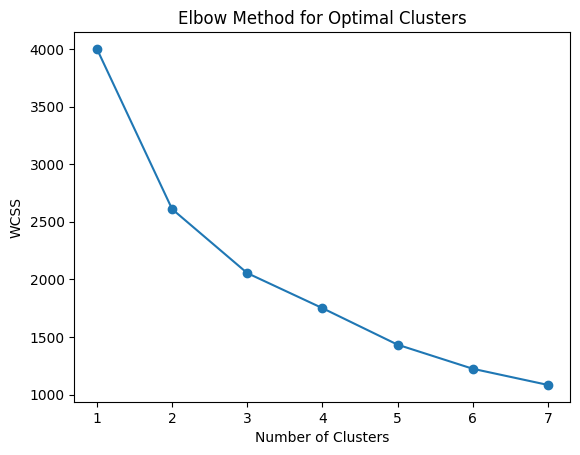

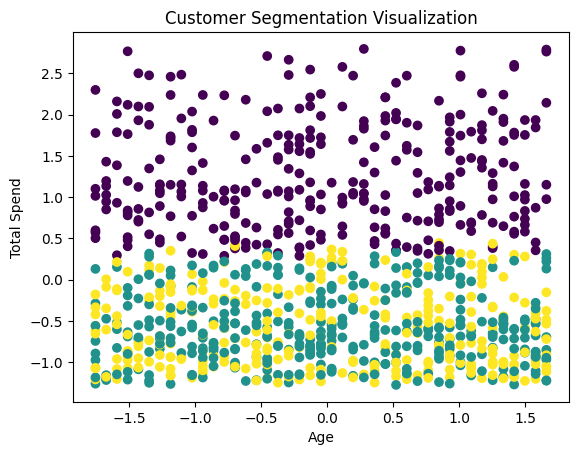

In [ ]:
# Selecting features for clustering
X = df[['Age', 'Price', 'Quantity', 'Total']]

# Determine optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(df['Age'], df['Total'], c=df['Customer_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.title('Customer Segmentation Visualization')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))


Cross-validation R² scores: [0.89162658 0.9097461  0.86948048 0.88489517 0.88444641]
Average R² Score: 0.8880389469835424


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")


Random Forest MAE: 0.0097
Random Forest R²: 0.9998


Confusion Matrix:
 [[56  0  0]
 [ 0 81  1]
 [ 0  0 62]]


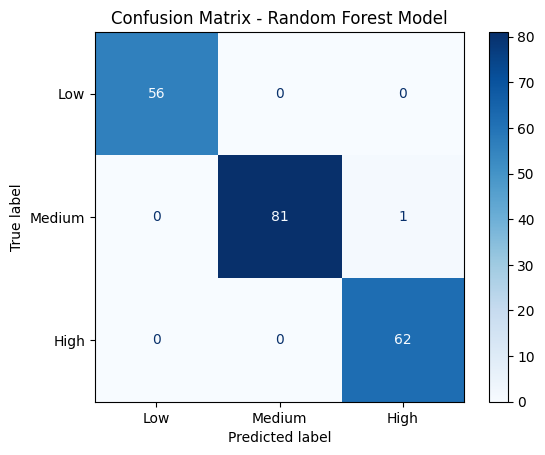


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        56
         Low       1.00      0.99      0.99        82
      Medium       0.98      1.00      0.99        62

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [ ]:
# Create spending category
def spending_category(total):
    if total < -0.5:
        return "Low"
    elif total < 0.5:
        return "Medium"
    else:
        return "High"

y_actual_class = pd.Series(y_test).apply(spending_category)
y_pred_class = pd.Series(y_pred_rf).apply(spending_category)

# Confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_actual_class, y_pred_class)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

print("\nClassification Report:")
print(classification_report(y_actual_class, y_pred_class))


In [ ]:
import joblib

# Assuming Random Forest performed best
joblib.dump(rf, "best_model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Saved best model and preprocessing tools successfully!")


✅ Saved best model and preprocessing tools successfully!


In [ ]:
# Example: Simulate one new customer's cart data
new_customer = {
    "Price": [150],      # price per item
    "Quantity": [3],     # number of items
    "Age": [25],         # customer age
    "Gender": [1],       # encoded Male=1, Female=0
    "Segment": [2]       # customer segment (encoded)
}

new_data = pd.DataFrame(new_customer)

# Create and fit a new scaler instance on the numerical features of the training data
numerical_features_for_prediction = ['Price', 'Quantity', 'Age']
new_scaler = StandardScaler()
new_scaler.fit(X_train[numerical_features_for_prediction]) # Fit on the numerical columns of X_train

# Apply the new scaler to the numerical columns of the new data
new_data[numerical_features_for_prediction] = new_scaler.transform(new_data[numerical_features_for_prediction])

# Ensure the new_data DataFrame has the same columns and order as the training data
# X_train columns were ['Price', 'Quantity', 'Age', 'Gender', 'Segment']
# Reindex new_data to match the columns of X_train
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)


# Predict total spend
predicted_total = rf.predict(new_data)[0]
print(f"🛒 Predicted Total Spend for New Customer: {predicted_total:.2f}")

# Predict category
predicted_category = spending_category(predicted_total)
print(f"💳 Spending Category: {predicted_category}")

🛒 Predicted Total Spend for New Customer: 2.75
💳 Spending Category: High


In [ ]:
# Defining features and target
X = df[['Price', 'Quantity', 'Age', 'Gender', 'Segment']]
y = df['Total']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluation metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.2491122962296023
R² Score: 0.8837427400369565


Training Data Shape: (800, 5)
Testing Data Shape: (200, 5)
✅ Model Performance:
Mean Absolute Error (MAE): 0.2491
R² Score: 0.8837


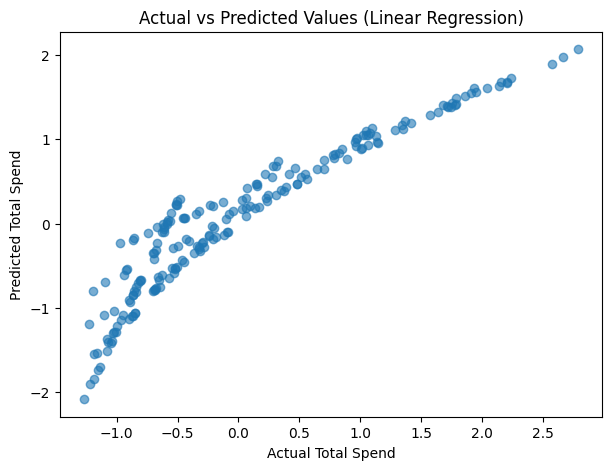

,Actual,Predicted
0,-0.608828,-0.041055
1,0.702287,0.652021
2,-1.100599,-0.691475
3,-0.705704,-0.346742
4,1.371391,1.213221
5,0.514281,0.547086
6,1.953470,1.560928
7,-0.860050,-0.805747
8,0.144017,0.465007
9,-0.577630,0.036917


In [ ]:
# === Define Features (X) and Target (y) ===
X = df[['Price', 'Quantity', 'Age', 'Gender', 'Segment']]  # independent variables
y = df['Total']                                            # dependent variable

# === Split Dataset into Training and Testing Sets ===
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# === Train the Linear Regression Model ===
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# === Predict on Test Data ===
y_pred = lr.predict(X_test)

# === Model Evaluation ===
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# === Visual Comparison: Actual vs Predicted ===
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Total Spend")
plt.ylabel("Predicted Total Spend")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

# === Optional: Display first 10 predictions ===
results = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_pred[:10]
})
display(results)


In [ ]:
# Prepare data for association rule mining
basket = df.groupby(['Customer_ID', 'Product_Name'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets using Apriori
frequent_items = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

print("Top 10 Association Rules:")
display(rules.sort_values('lift', ascending=False).head(10))

# Recommendation function
def recommend_products(product_name):
    related = rules[rules['antecedents'].apply(lambda x: product_name in list(x))]
    related = related.sort_values('lift', ascending=False)
    if not related.empty:
        return list(related.iloc[0]['consequents'])
    else:
        return ["No related product found"]

# Example usage
print("Recommended with 'Grocery_Item_10':", recommend_products('Grocery_Item_10'))

Top 10 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
52706,"(Snacks_Item_27, Stationery_Item_1)","(Personal Care_Item_18, Beverages_Item_32, Sna...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
52709,(Snacks_Item_16),"(Personal Care_Item_18, Beverages_Item_32, Gro...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45432,"(Stationery_Item_1, Beverages_Item_32, Grocery...","(Electronics_Item_40, Snacks_Item_27, Personal...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45433,"(Snacks_Item_27, Beverages_Item_32, Grocery_It...","(Electronics_Item_40, Personal Care_Item_18, S...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45434,"(Electronics_Item_40, Snacks_Item_27, Beverage...","(Personal Care_Item_18, Grocery_Item_46, Stati...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45435,"(Electronics_Item_40, Beverages_Item_32, Stati...","(Snacks_Item_27, Personal Care_Item_18, Grocer...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45436,"(Electronics_Item_40, Snacks_Item_27, Beverage...","(Personal Care_Item_18, Grocery_Item_46, Stati...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45437,"(Snacks_Item_27, Beverages_Item_32, Stationery...","(Electronics_Item_40, Personal Care_Item_18, G...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45438,"(Electronics_Item_40, Snacks_Item_27, Grocery_...","(Personal Care_Item_18, Beverages_Item_32, Sta...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0
45439,"(Electronics_Item_40, Stationery_Item_1, Groce...","(Snacks_Item_27, Personal Care_Item_18, Bevera...",0.01,0.01,0.01,1.0,100.0,1.0,0.0099,inf,1.0,1.0,1.0,1.0


Recommended with 'Grocery_Item_10': ['Personal Care_Item_2']


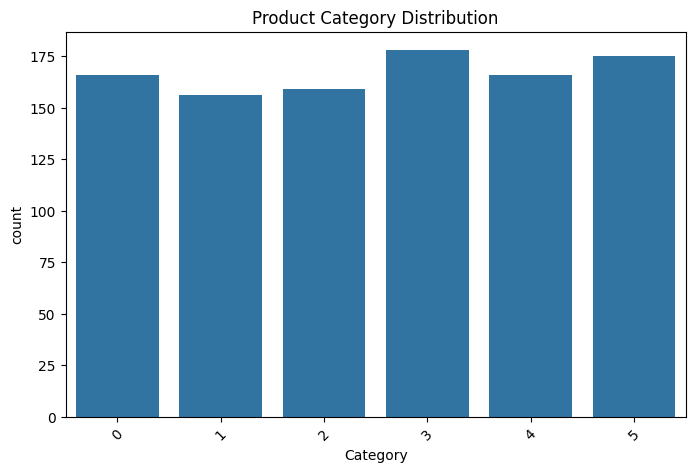

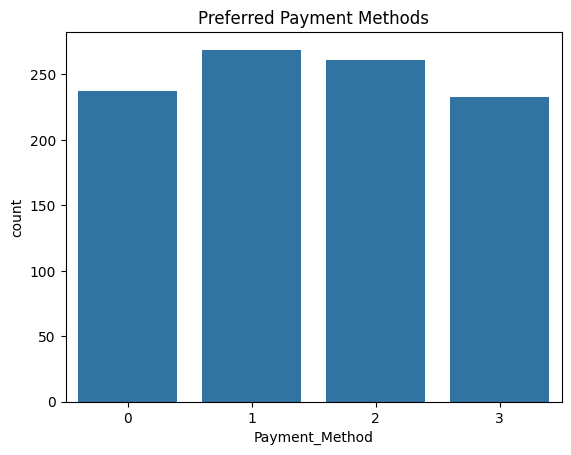

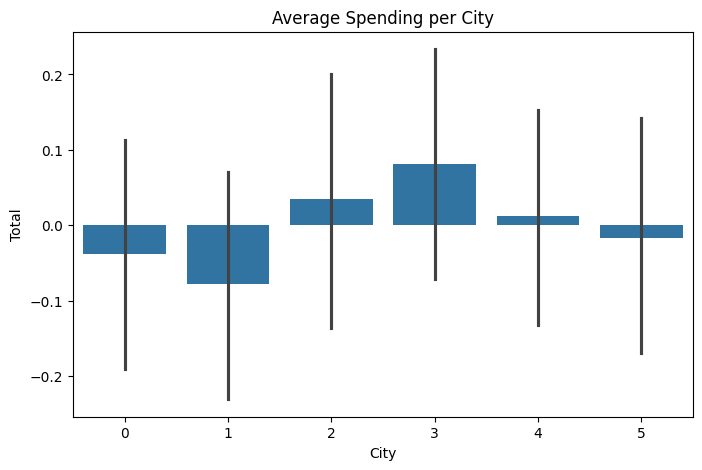

In [ ]:
# Category distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Category', data=df)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Payment method preference
sns.countplot(x='Payment_Method', data=df)
plt.title("Preferred Payment Methods")
plt.show()

# Total Spend per City
plt.figure(figsize=(8,5))
sns.barplot(x='City', y='Total', data=df)
plt.title("Average Spending per City")
plt.show()


In [ ]:
# Save the processed version for website use
df.to_csv('processed_smartcart.csv', index=False)
print("✅ Processed dataset saved as processed_smartcart.csv")


✅ Processed dataset saved as processed_smartcart.csv
